# Gold Price Prediction

In [37]:
#  Import the required Library for te
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Collection and Processing Step.

In [38]:
dataset = pd.read_csv("gld_price_data.csv")
dataset.head()

,Date,SPX,USO,SLV,EUR/USD,GLD
0,01-02-2008,1447.160034,78.470001,15.180,1.471692,84.860001
1,01-03-2008,1447.160034,78.370003,15.285,1.474491,85.570000
2,01-04-2008,1411.630005,77.309998,15.167,1.475492,85.129997
3,01-07-2008,1416.180054,75.500000,15.053,1.468299,84.769997
4,01-08-2008,1390.189941,76.059998,15.590,1.557099,86.779999


In [39]:
#  Check the number of rows and columns.
dataset.shape

# There are 2290 are rows and 6 columns.

(2290, 6)

In [40]:
# Check the Null or missing value.
dataset.isnull().sum()

#  As per the data it is good to know about that we dont have any kind of missing data.

Date       0
SPX        0
USO        0
SLV        0
EUR/USD    0
GLD        0
dtype: int64

In [41]:
# check the datatype of the dataset features.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
 5   GLD      2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [42]:
# Check the statistical function for the dataset.
dataset.describe()

,SPX,USO,SLV,EUR/USD,GLD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,31.842221,20.084997,1.283653,122.732875
std,519.111540,19.523517,7.092566,0.131547,23.283346
min,676.530029,7.960000,8.850000,1.039047,70.000000
25%,1239.874969,14.380000,15.570000,1.171313,109.725000
50%,1551.434998,33.869999,17.268500,1.303297,120.580002
75%,2073.010070,37.827501,22.882500,1.369971,132.840004
max,2872.870117,117.480003,47.259998,1.598798,184.589996


## Data Analysis and Visualization Part.

In [43]:
#  find the correlation for the dataset feature.
# correlation_dataset = dataset.drop("Date", axis=1)
# correlation_dataset

correlation = correlation_dataset.corr()
correlation

,SPX,USO,SLV,EUR/USD,GLD
SPX,1.000000,-0.591573,-0.274055,-0.672017,0.049345
USO,-0.591573,1.000000,0.167547,0.829317,-0.186360
SLV,-0.274055,0.167547,1.000000,0.321631,0.866632
EUR/USD,-0.672017,0.829317,0.321631,1.000000,-0.024375
GLD,0.049345,-0.186360,0.866632,-0.024375,1.000000


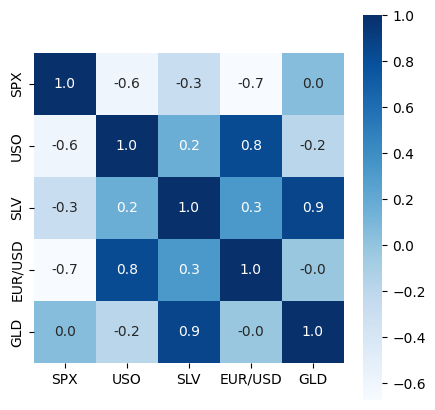

In [44]:
# Creating the Heatmap for showing the correlation between the features.
plt.figure(figsize=(5,5))
sns.heatmap(data = correlation, cbar = True, annot=True, fmt='.1f', square=True, cmap="Blues")
plt.show()

<Figure size 700x700 with 0 Axes>

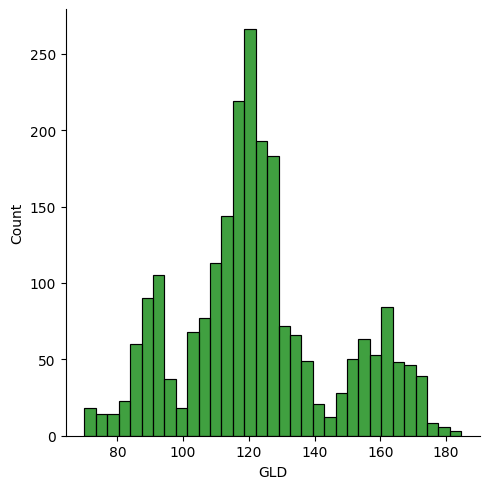

In [48]:
#  Check the dependency of the features to each other.
plt.figure(figsize=(7,7))
sns.displot(x = dataset["GLD"],data = dataset, color="green")
plt.show()

<Figure size 700x700 with 0 Axes>

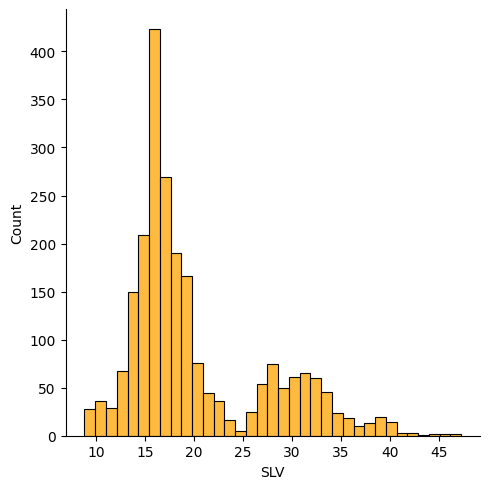

In [50]:
#  Check the dependency of the features to each other.
plt.figure(figsize=(7,7))
sns.displot(x = dataset["SLV"],data = dataset, color="orange")
plt.show()

## Splitting Dataset into the dependent and independent variable.

In [19]:
x = dataset.drop(columns=["Date", "GLD"], axis=1)
y = dataset["GLD"]

In [22]:
# Splitting the data into the training and testing dataset.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [23]:
# Random Forest Model Implementation.
model = RandomForestRegressor()

In [24]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
#  Find the accuracy for the training and the testing dataset.

# Predict the score for the training data
training_data_pred = model.predict(x_train)

In [32]:
# Find the error Score for the Random Forest Algorithm.
error_score = metrics.r2_score(training_data_pred, y_train)
error_score * 100

99.84958582261845

Text(0.5, 1.0, 'Actual and the Prediction Price')

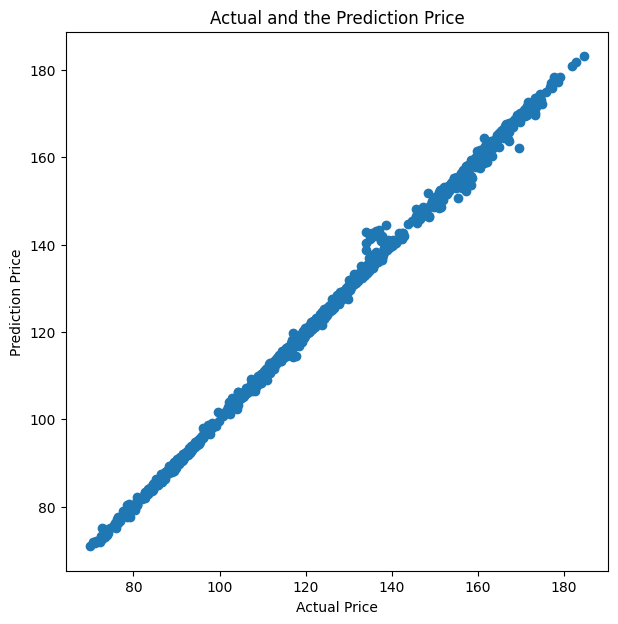

In [33]:
#  Visualize the Graph for the actual and the prediction price.
plt.figure(figsize=(7,7))
plt.scatter(y_train, training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Actual and the Prediction Price")

In [34]:
#  Find the accuracy for the training and the testing dataset.

# Predict the score for the testing data
testing_data_pred = model.predict(x_test)

In [35]:
# Find the error Score for the Random Forest Algorithm.
error_score2 = metrics.r2_score(testing_data_pred, y_test)
error_score2 * 100

98.89229187701122

Text(0.5, 1.0, 'Actual and the Prediction Price')

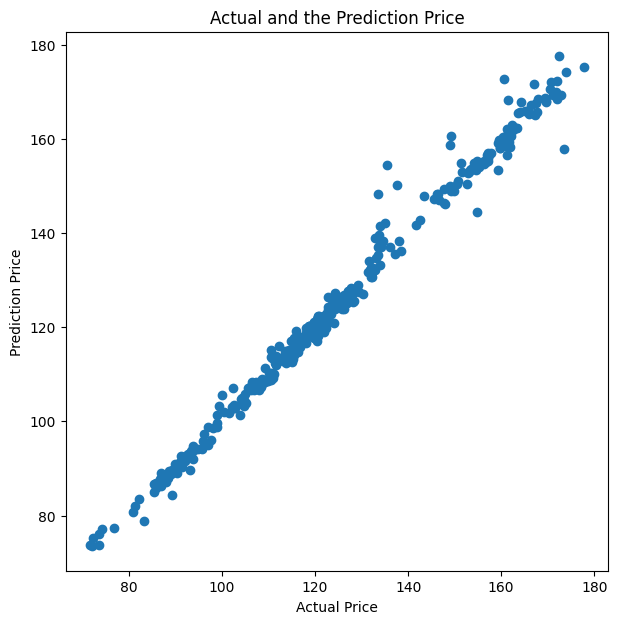

In [36]:
#  Visualize the Graph for the actual and the prediction price.
plt.figure(figsize=(7,7))
plt.scatter(y_test, testing_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Actual and the Prediction Price")

## Predicting Value using the Random Forest Regressor Model

In [53]:

# input_data = (1447.160034,78.470001,15.18,1.471692)
# input_data = (1333.25,71.029999,15.717,1.464)
input_data = (1125.859985,36.48,17.959999,1.322506)

# convert into the numpy array.
numpy_array = np.asarray(input_data)

# convert into the 2D Numpy Array.
shaped_array = numpy_array.reshape(1,-1)

prediction = model.predict(shaped_array)
prediction

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([116.03250116])